### Regression for Exponential Growth - Applied to the Corona Virus

See https://towardsdatascience.com/modeling-exponential-growth-49a2b6f22e1f

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,782,789,795,803,820,832,842,850,856,868
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,745,747,748,750,751,751,752,752,754,755
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,30,35,35,35,36,36,36,43,43,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,16,16,16,23,174,174,187,208,208,208
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7,10,10,12,22,25,25,34,34,51
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,1,3,3,3,3,8,8,8,11,11


In [4]:
# US data only
us_data = confirmed_df.loc[confirmed_df['Country/Region'] == 'US']
us_time_series_only = us_data.drop(["Province/State", "Country/Region", "Lat", "Long"], axis=1)
us_time_series_only = us_time_series_only.transpose()
us_time_series_only.columns = ['Confirmed']
us_time_series_only

,Confirmed
1/22/20,1
1/23/20,1
1/24/20,2
1/25/20,2
1/26/20,5
...,...
5/6/20,1229331
5/7/20,1257023
5/8/20,1283929
5/9/20,1309550


This is a running total

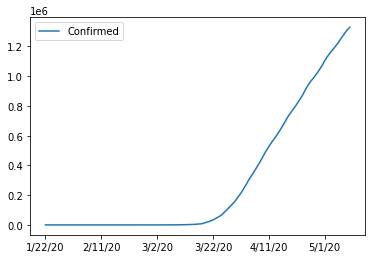

In [5]:
us_time_series_only.plot()

Daily new cases

In [49]:
us_time_series_only.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20',
       '5/8/20', '5/9/20', '5/10/20'],
      dtype='object', length=110)

In [50]:
us_time_series_only.columns

Index(['Confirmed'], dtype='object')

In [51]:
us_time_series_only['logInfections'] = np.log(us_time_series_only['Confirmed'])
us_time_series_only

,Confirmed,logInfections
1/22/20,1,0.000000
1/23/20,1,0.000000
1/24/20,2,0.693147
1/25/20,2,0.693147
1/26/20,5,1.609438
...,...,...
5/6/20,1229331,14.021981
5/7/20,1257023,14.044257
5/8/20,1283929,14.065435
5/9/20,1309550,14.085194


In [52]:
us_time_series_only['Day'] = range(len(us_time_series_only))
us_time_series_only

,Confirmed,logInfections,Day
1/22/20,1,0.000000,0
1/23/20,1,0.000000,1
1/24/20,2,0.693147,2
1/25/20,2,0.693147,3
1/26/20,5,1.609438,4
...,...,...,...
5/6/20,1229331,14.021981,105
5/7/20,1257023,14.044257,106
5/8/20,1283929,14.065435,107
5/9/20,1309550,14.085194,108


In [53]:
X = us_time_series_only.Day
X = sm.add_constant(X)

In [54]:
y = us_time_series_only.logInfections

In [55]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1842.
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.09e-69
Time:                        23:22:39   Log-Likelihood:                -172.48
No. Observations:                 110   AIC:                             349.0
Df Residuals:                     108   BIC:                             354.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0980      0.222     -0.442      0.6

#### Reading the table to make predictions 

In [56]:
a =  -0.0980
b = 0.1510

In [57]:
# log initial = 0.4480
# initial = 
np.exp(a)

0.9066489037539209

In [58]:
# log 1 + r = 0.1128
# real 1 + r = 
np.exp(b)

1.1629966580818203

In [59]:
def linear_predictions(t):
    return np.exp(a) * np.exp(b) ** t

In [61]:
us_time_series_only['Predictions'] = us_time_series_only.Day.apply(linear_predictions)
us_time_series_only.tail()

,Confirmed,logInfections,Day,Predictions
5/6/20,1229331,14.021981,105,6.969123e+06
5/7/20,1257023,14.044257,106,8.105067e+06
5/8/20,1283929,14.065435,107,9.426166e+06
5/9/20,1309550,14.085194,108,1.096260e+07
5/10/20,1329260,14.100133,109,1.274947e+07


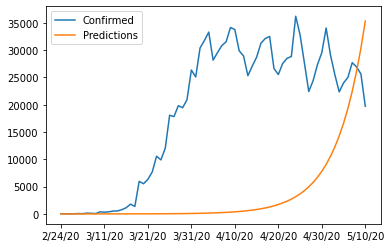

In [62]:
daily_diff.drop(["Day", "logInfections"], axis=1).plot()